In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'D:\Downloads\rk_month.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'365']

In [6]:
X1 = df[['From Date','year', 'month', 'day']]
Y1 = df['NOx']

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=5)

In [8]:
grad_boost = GradientBoostingRegressor(n_estimators=1000,
                                      max_depth=8,
                                      max_features='auto',
                                      min_samples_split=6,
                                      min_samples_leaf=6,
                                      learning_rate=0.01)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.01, max_depth=8, max_features='auto',
                          min_samples_leaf=6, min_samples_split=6,
                          n_estimators=1000)

In [9]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9453011607277962

Score on test data: 0.6714119459898934

Root Mean Squared Error: 56.97936539476826

Overall model accuracy: 0.6714119459898934


In [10]:
test=data.loc['366':'418']
X=test[['From Date','year', 'month', 'day']]
X

,From Date,year,month,day
366,737436,2020,1,12
367,737443,2020,1,19
368,737450,2020,1,26
369,737457,2020,2,2
370,737464,2020,2,9
371,737471,2020,2,16
372,737478,2020,2,23
373,737485,2020,3,1
374,737492,2020,3,8
375,737499,2020,3,15


In [11]:
predict=grad_boost.predict(X)

In [12]:
predict

array([72.95177174, 60.43335952, 57.88949182, 67.27105917, 67.97340276,
       69.84899711, 63.9148428 , 82.96671935, 75.05803431, 63.4151165 ,
       57.69031436, 44.46641532, 74.45273795, 65.02816976, 59.69337925,
       51.88674356, 73.68568526, 62.38239325, 60.58971352, 61.23160352,
       90.09486321, 58.38343526, 46.33849165, 48.66941703, 40.20987576,
       23.81800741, 31.82204499, 39.29485303, 25.47035299, 13.42340659,
       28.18366292, 29.23046637, 27.95677412, 27.3474067 , 11.58155878,
       25.75733878, 32.10395216, 21.27549491, 45.0178173 , 56.73421909,
       69.0497917 , 70.49442521, 49.53274382, 76.1583082 , 54.68321396,
       62.127463  , 55.3274939 , 91.58949732, 93.10357327, 57.60282157,
       50.34175124, 62.10123885])

In [13]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [14]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [15]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [16]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

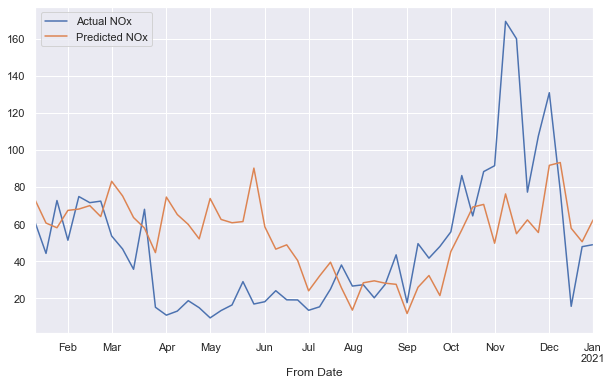

In [17]:
test['NOx'].plot(legend=True, label='Actual NOx', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NOx')

In [18]:
np.sqrt(mean_squared_error(test['NOx'],X['pred']))

35.32529434884335

In [19]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 37.299485658442805
MSE: 3246.6480807905145
RMSE: 56.97936539476826
R-Squared: 0.6714119459898934


In [20]:
mae = metrics.mean_absolute_error(test['NOx'],X['pred'])
mse = metrics.mean_squared_error(test['NOx'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NOx'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 27.211670608765424
MSE: 1247.8764208324242
RMSE: 35.32529434884335
R-Squared: 0.05847303312497498


In [21]:
import pickle
filename = 'NOx_gboostmodel.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [22]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.6714119459898934


# 3rd plot

In [23]:
testcase = pd.DataFrame()

In [24]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [25]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [26]:
testcase

,test,pred,Corrected
252,354.824286,478.344970,421.365605
223,97.934286,84.507583,141.486948
321,117.698571,88.121132,145.100497
163,139.588571,213.456950,156.477584
276,82.070000,91.036141,34.056775
...,...,...,...
149,165.074286,170.358806,113.379441
244,15.342857,41.149603,-15.829762
305,132.630000,192.370702,135.391337
230,85.808571,66.361592,123.340958


In [27]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [28]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.7862361549169234

In [29]:
test2020=pd.DataFrame()

In [30]:
test2020['test']=test['NOx']
test2020['pred']=X['pred']

In [31]:
test2020.index=test.index

In [32]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

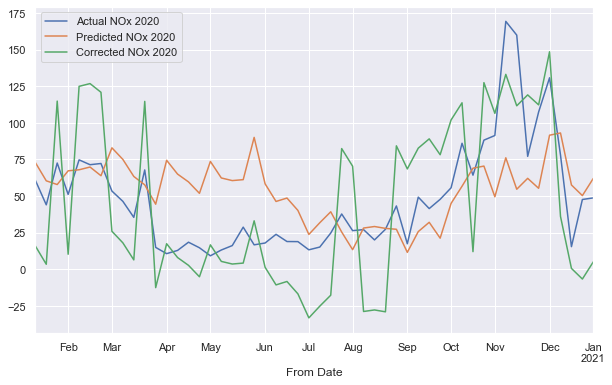

In [33]:
test2020['test'].plot(legend=True, label='Actual NOx 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NOx 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NOx 2020')

In [34]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.5490850966160818

In [35]:
test2020.loc["2020-05-18":"2020-05-31",'pred'].median()

75.6632333662089